In [33]:
import numpy as np
import matplotlib.pyplot as plt

Initial Condition

In [2]:
x0=0
v0=1
t=70   # T is 2*pi
delta=1000
delta_t=t/delta
time=np.linspace(0,t,delta+1)

Euler

In [3]:
def Speed_Generator(v,x):
    '''This function returns v_n . x is x_n-1 and v is v_n-1'''
    return v - x * delta_t

In [4]:
def Place_Generator(v,x):
    ''''This function returns x_n . x is x_n-1 and v is v_n-1'''
    return x + v * delta_t

In [5]:
s1=[1]
p1=[0]
v=v0
x=x0
for i in range (delta):
    a=Speed_Generator(v,x)
    s1.append(a)
    b=Place_Generator(v,x)
    p1.append(b)
    v=a
    x=b

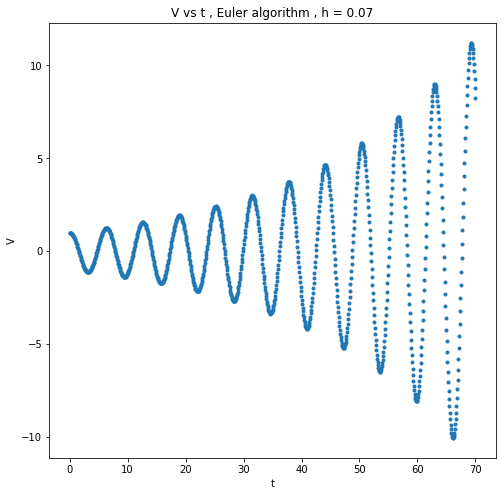

In [6]:
fig = plt.figure(figsize=(8,8))
plt.title('V vs t , Euler algorithm , h = 0.07')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(time,s1,'.')

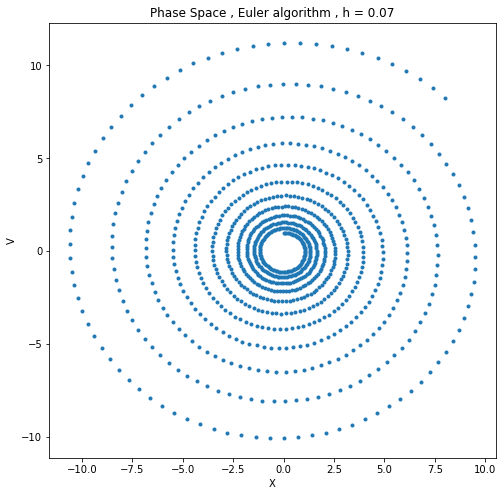

In [7]:
#Conservation of Energy
fig = plt.figure(figsize=(8,8))
plt.title('Phase Space , Euler algorithm , h = 0.07')
plt.xlabel('X')
plt.ylabel('V')
plt.plot(p1,s1,'.')

Euler-Kramer

In [8]:
s2=[1]
p2=[0]
b=v0
a=x0
for i in range (delta) :
    v=b-a*delta_t
    s2.append(v)
    x=a+v*delta_t
    p2.append(x)
    a=x
    b=v

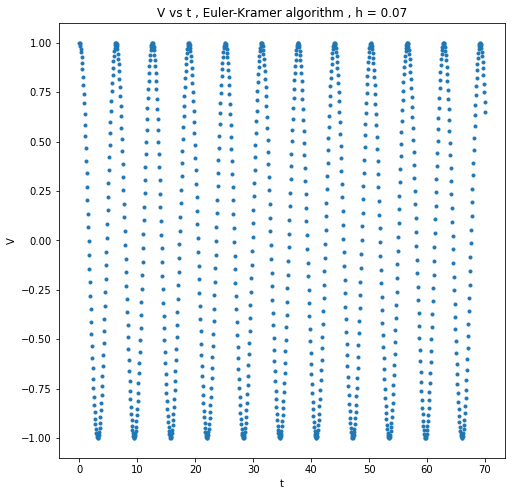

In [9]:
fig = plt.figure(figsize=(8,8))
plt.title('V vs t , Euler-Kramer algorithm , h = 0.07')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(time,s2,'.')

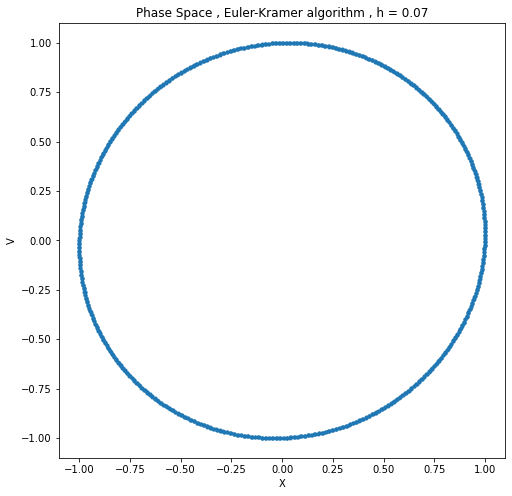

In [10]:
#Conservation of Energy
fig = plt.figure(figsize=(8,8))
plt.title('Phase Space , Euler-Kramer algorithm , h = 0.07')
plt.xlabel('X')
plt.ylabel('V')
plt.plot(p2,s2,'.')

Verlet

In [11]:
p3=np.zeros(delta+1)
p3[1]=delta_t
s3=np.zeros(delta+1)
s3[0]=1 
s3[1]=1
for i in range (2,delta+1) :
    p3[i]=2*p3[i-1]-p3[i-2]-p3[i-1]*(delta_t)**2
    s3[i]=s3[i-1]-p3[i-1]*delta_t

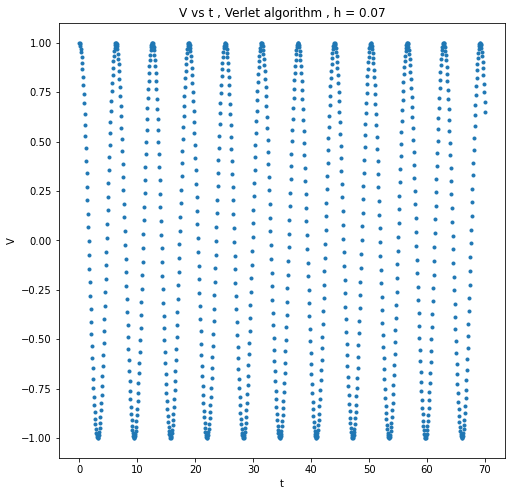

In [12]:
fig = plt.figure(figsize=(8,8))
plt.title('V vs t , Verlet algorithm , h = 0.07')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(time,s3,'.')

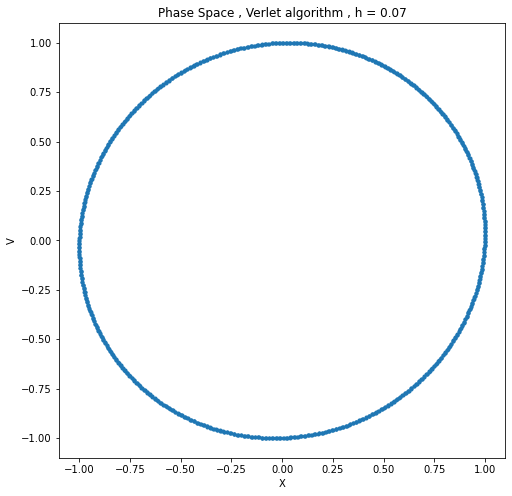

In [13]:
#Conservation of Energy
fig = plt.figure(figsize=(8,8))
plt.title('Phase Space , Verlet algorithm , h = 0.07')
plt.xlabel('X')
plt.ylabel('V')
plt.plot(p3,s3,'.')

Velocity Verlet

In [14]:
p4=np.zeros(delta+1)
s4=np.zeros(delta+1)
s4[0]=1
for i in range (1,delta+1) :
    p4[i]=p4[i-1]+s4[i-1]*delta_t-0.5*p4[i-1]*(delta_t)**2
    s4[i]=s4[i-1]-0.5*(p4[i]+p4[i-1])*delta_t

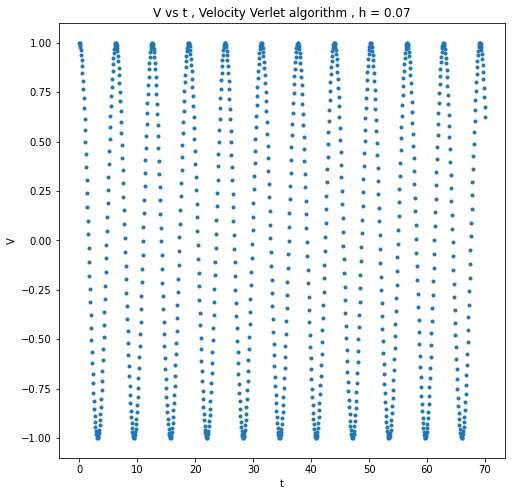

In [15]:
fig = plt.figure(figsize=(8,8))
plt.title('V vs t , Velocity Verlet algorithm , h = 0.07')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(time,s4,'.')

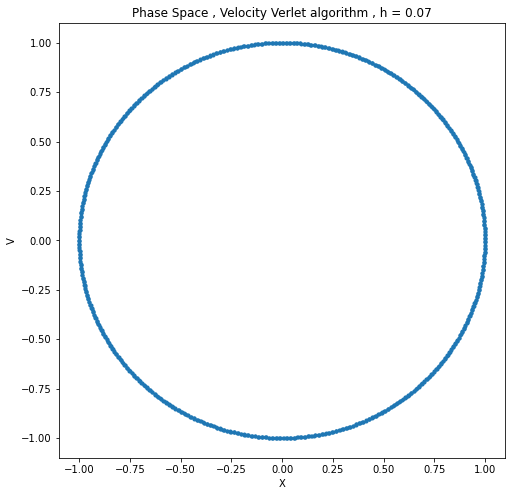

In [16]:
#Conservation of Energy
fig = plt.figure(figsize=(8,8))
plt.title('Phase Space , Velocity Verlet algorithm , h = 0.07')
plt.xlabel('X')
plt.ylabel('V')
plt.plot(p4,s4,'.')

Beeman

In [17]:
p5=np.zeros(delta+1)
p5[1]=delta_t  
s5=np.zeros(delta+1)
s5[0]=1
s5[1]=1
a=np.zeros(delta+1)
a[1]=-1*delta_t
for i in range (2,delta+1) :
    p5[i]=p5[i-1]+s5[i-1]*delta_t+1/6*(4*a[i-1]-a[i-2])*(delta_t)**2
    a[i]=-1*p5[i]
    s5[i]=s5[i-1]+1/6*(2*a[i]+5*a[i-1]-a[i-2])*delta_t

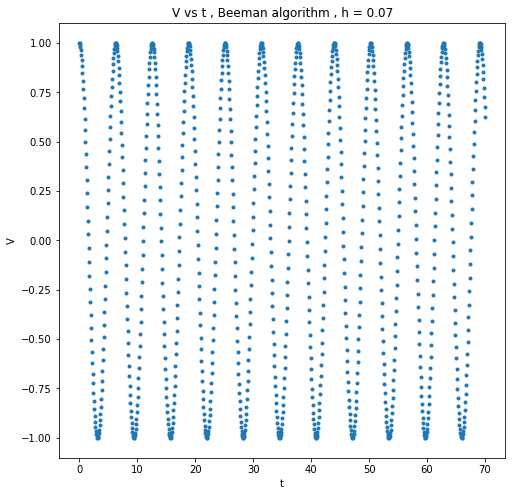

In [18]:
fig = plt.figure(figsize=(8,8))
plt.title('V vs t , Beeman algorithm , h = 0.07')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(time,s5,'.')

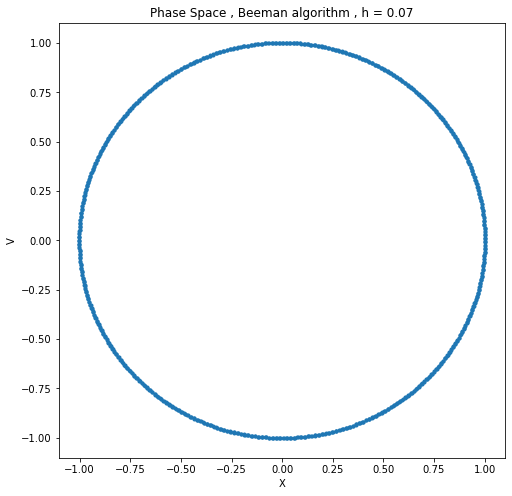

In [19]:
#Conservation of Energy
fig = plt.figure(figsize=(8,8))
plt.title('Phase Space , Beeman algorithm , h = 0.07')
plt.xlabel('X')
plt.ylabel('V')
plt.plot(p5,s5,'.')

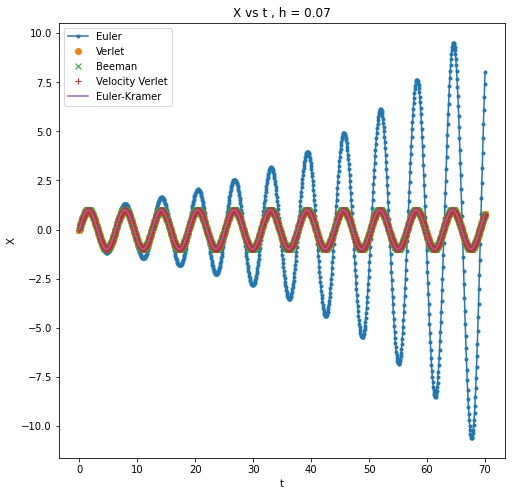

In [32]:
fig = plt.figure(figsize=(8,8))
plt.title('X vs t , h = 0.07')
plt.xlabel('t')
plt.ylabel('X')
plt.plot(time,p1,'.-',label='Euler')
plt.plot(time,p3,'o',label='Verlet')
plt.plot(time,p5,'x',label='Beeman')
plt.plot(time,p4,'+',label='Velocity Verlet')
plt.plot(time,p2,'-',label='Euler-Kramer')
plt.legend()